1. In this question, you will implement the Minimum Spanning Tree (MST) approach to cluster the Iris dataset using only the sepal length and sepal width features. Your task is to write a Python program that performs the following steps:

    Load the Iris dataset.

    Extract the sepal length and sepal width columns.
    
    Calculate the pairwise Euclidean distances between data points using the selected features.
    
    Build the Minimum Spanning Tree using Prim's/Kruskal’s algorithm.
    
    Identify the two longest edges in the MST and remove them to create three clusters.
    
    Visualize the Minimum Spanning Tree with identified clusters.
NOTE: For help you can refer to presentation no 04.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Loading the iris dataset.
iris_df = pd.read_csv('../iris.csv')
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
# Here variety should also be taken as it is the class label
df = pd.DataFrame()
df['sepal.length'] = iris_df['sepal.length']
df['sepal.width'] = iris_df['sepal.width']
df['variety'] = iris_df['variety']
df

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


In [7]:
def euclidean_distance(x, y):
    
    x = np.array(x)
    y = np.array(y)

    distances = np.linalg.norm(x - y)
    return distances


#n = len(temp_df['sepal.length'])

def make_matrix(temp_df):
    
    n = len(temp_df['sepal.length'])
    mat = [[0] * n for _ in range(n)]
    for i  in range(n):
        x = [ temp_df['sepal.length'].iloc[i], temp_df['sepal.width'].iloc[i] ] 
        for j in range(n):
            y = [ temp_df['sepal.length'].iloc[j], temp_df['sepal.width'].iloc[j] ] 
            mat[i][j] = euclidean_distance(x, y)

    return mat

temp_df = df.drop(columns = ['variety'])
distance_matrix = np.array(make_matrix(temp_df))
print("Distances:\n", distance_matrix, end = '\n')

Distances:
 [[0.         0.53851648 0.5        ... 1.48660687 1.1045361  0.94339811]
 [0.53851648 0.         0.28284271 ... 1.6        1.36014705 1.        ]
 [0.5        0.28284271 0.         ... 1.81107703 1.5132746  1.21655251]
 ...
 [1.48660687 1.6        1.81107703 ... 0.         0.5        0.6       ]
 [1.1045361  1.36014705 1.5132746  ... 0.5        0.         0.5       ]
 [0.94339811 1.         1.21655251 ... 0.6        0.5        0.        ]]


In [14]:
#Prim's algorithm
def mst(distance_matrix, n):

    mst_edges = []
    nodes = [0]
    rem_nodes = set(range(1, n))

    while rem_nodes:
        min_edge = None
        min_weight = float('inf')

        #Find the minimum weight edge connecting a selected node to a remaining node.
        for u in nodes:
            for v in rem_nodes:
                if distance_matrix[u][v] < min_weight:
                    min_weight = distance_matrix[u][v]
                    min_edge = (u, v, min_weight)
        
        #Add the found edge to MST
        if min_edge:
            u, v, w = min_edge
            mst_edges.append((u, v, w))

        #Update  nodes and rem_nodes
        nodes.append(v)
        rem_nodes.remove(v)

    return mst_edges

In [16]:
def create_clusters(mst_edges, df):
    #Sort the edges
    mst_edges = sorted(mst_edges, key = lambda x: x[2], reverse = True)

    #Remove two longest edges
    long_edges = mst_edges[:2]
    mst_edges = mst_edges[2:]

    #Plot
    plt.figure(figsize = (8, 6))

    #Plotting all points
    plt.scatter(df.iloc[:, 0], df.iloc[:, -1], color = 'blue')

    #Plot the edges in MST
    for u, v, w in mst_edges:
        u1 = df.iloc[u]
        v1 = df.iloc[v]
        #Black solid lines for normal edges.
        plt.plot([u1[0], v1[0]], [u1[1], v1[1]], 'k-', lw = 1)

    #Plot longest edges using other color
    for u, v, w in long_edges:
        u1 = df.iloc[u]
        v1 = df.iloc[v]
        #Red - dotted lines for removed ones.
        plt.plot([u1[0], v1[0]], [u1[1], v1[1]], 'r--', lw = 2)

    plt.title("MST of the dataset")
    plt.xlabel("Sepal Length(cm)")
    plt.ylabel("Sepal width(cm)")
    plt.legend()
    plt.show()
        


/tmp/ipykernel_6636/227788187.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([u1[0], v1[0]], [u1[1], v1[1]], 'k-', lw = 1)
/tmp/ipykernel_6636/227788187.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([u1[0], v1[0]], [u1[1], v1[1]], 'r--', lw = 2)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


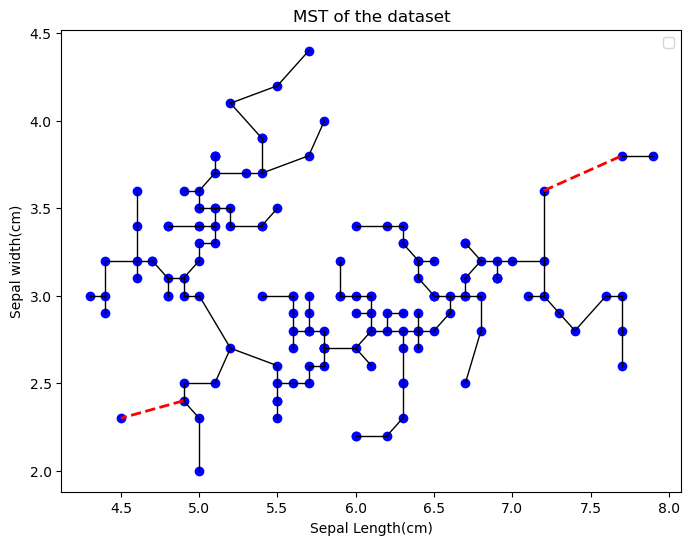

In [17]:
n = temp_df.shape[0]
mst_edges = mst(distance_matrix, n)
create_clusters(mst_edges, temp_df)